In [1]:
import torch

data = [1, 2, 3]
x_data = torch.tensor(data)

print(data)
print(x_data)

ModuleNotFoundError: No module named 'torch'

In [2]:
import torch

t1 = torch.tensor([[1.0, 0], [2, 3]])

print(t1)

print("\n")
print(t1.numpy())
print(torch.tensor(t1.numpy()))


tensor([[1., 0.],
        [2., 3.]])


[[1. 0.]
 [2. 3.]]
tensor([[1., 0.],
        [2., 3.]])


In [4]:
shape = (3, 5)

rand_tensor = torch.rand(3, 5)
agg = rand_tensor.sum()

avg = rand_tensor.mean()

In [14]:
# zadanie 0
z1 = torch.tensor([1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0])

z1_sum = z1.sum()  # aggregation
z1_avg = z1.mean()  # average
print(f"{z1_sum=}\n{z1_avg=}")

z1_log2 = z1.log2()
print(f"{z1_log2}")

z1_min = z1.min()
print(f"{z1_min=}")

z1_max = z1.max()
print(f"{z1_max=}")

z1_std = z1.std()
print(f"{z1_std=}")

z1_bern = z1.bernoulli(0.3)
print(f"{z1_bern=}")

z1_sum=tensor(55.)
z1_avg=tensor(5.5000)
tensor([0.0000, 1.0000, 1.5850, 2.0000, 2.3219, 2.5850, 2.8074, 3.0000, 3.1699,
        3.3219])
z1_min=tensor(1.)
z1_max=tensor(10.)
z1_std=tensor(3.0277)
z1_bern=tensor([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.])


In [16]:
z1 = torch.tensor([1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0])

# underscore overwrites original tensor
z1.pow_(2)
print(f"{z1=}")


z1=tensor([  1.,   4.,   9.,  16.,  25.,  36.,  49.,  64.,  81., 100.])


In [20]:
# calculating f(x, y) = x*y + y at point (1000, 2)
x = torch.tensor([1000.0], requires_grad=True)
y = torch.tensor([2.0], requires_grad=True)

print(f"dx/dx = {x.grad}")
print(f"dy/dy = {y.grad}")

f = x @ y + y

f.backward()  # calculate a gradient of this tensor
print(f"{f=}")
print(f"df/dx = {x.grad}")
print(f"df/dy = {y.grad}")

dx/dx = None
dy/dy = None
f=tensor([2002.], grad_fn=<AddBackward0>)
df/dx = tensor([2.])
df/dy = tensor([1001.])


In [48]:
# f(x, y, z) = z^4 * x^2 + y^3
# x = 1, y = 2, z = 3

x = torch.tensor([1.0], requires_grad=True)
y = torch.tensor([2.0], requires_grad=True)
z = torch.tensor([3.0], requires_grad=True)

f = z**4 @ x**2 + y**3

df_dx = torch.autograd.grad(f, x, create_graph=True)
df_dy = torch.autograd.grad(f, y, create_graph=True)
df_dz = torch.autograd.grad(f, z, create_graph=True)
print(f"df/dx = {df_dx[0].item()}")
print(f"df/dy = {df_dy[0].item()}")
print(f"df/dz = {df_dz[0].item()}")

df2_dx = torch.autograd.grad(df_dx, x, create_graph=True)
df2_dy = torch.autograd.grad(df_dy, y, create_graph=True)
df2_dz = torch.autograd.grad(df_dz, z, create_graph=True)
print(f"df2/dx = {df2_dx[0].item()}")
print(f"df2/dy = {df2_dy[0].item()}")
print(f"df2/dz = {df2_dz[0].item()}")

df3_dx = torch.autograd.grad(df2_dx, x, create_graph=True)
df3_dy = torch.autograd.grad(df2_dy, y, create_graph=True)
df3_dz = torch.autograd.grad(df2_dz, z, create_graph=True)
print(f"df3/dx = {df3_dx[0].item()}")
print(f"df3/dy = {df3_dy[0].item()}")
print(f"df3/dz = {df3_dz[0].item()}")


df/dx = 162.0
df/dy = 12.0
df/dz = 108.0
df2/dx = 162.0
df2/dy = 12.0
df2/dz = 108.0
df3/dx = 0.0
df3/dy = 6.0
df3/dz = 72.0


(-3.0, 2.0)

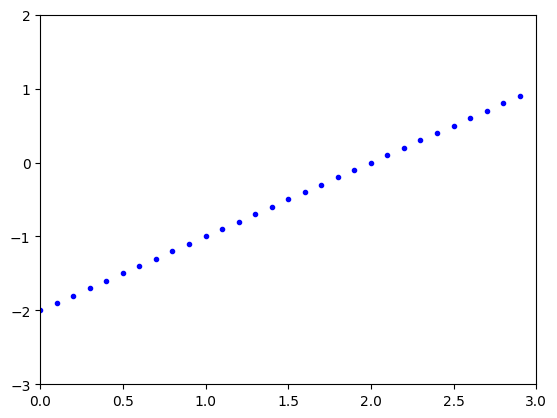

In [52]:
# zadanie 1
# linear regression with tensors and manual calculation of cost function
# y = bx - a

# y = 2x - 1  # do uczenia (?)

# dane uczace
import torch
import numpy as np
import matplotlib.pyplot as plt


def lin_f(X, a):
    return a[1] * X - a[0]


X = torch.arange(0, 3, 0.1)
f = lin_f(X, [2, 1])

fig = plt.figure()
ax = plt.axes()
ax.plot(X, f.detach().numpy(), ".", color="blue")
ax.set_xlim([0, 3])
ax.set_ylim([-3, 2])

tensor([2.0000, 1.0000], requires_grad=True)


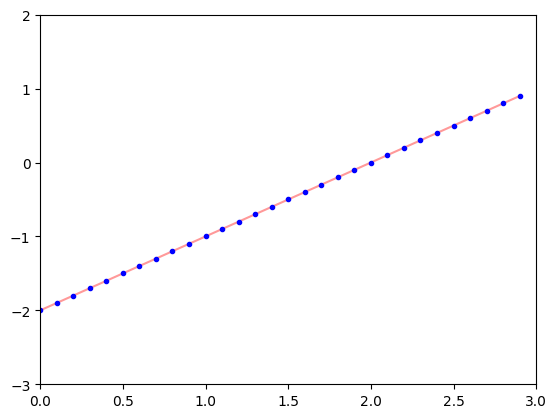

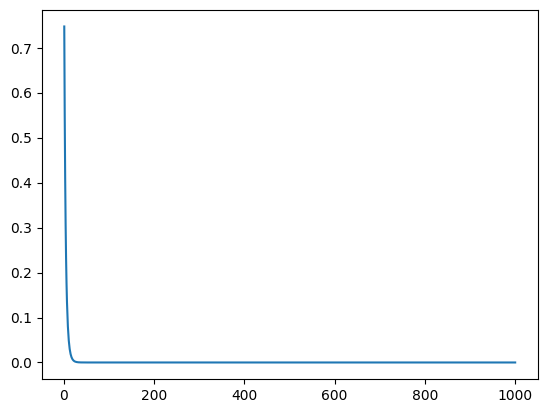

In [100]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output


def lin_f(X, a):
    return a[1] * X - a[0]


def mse(o1, o2):
    dif = o1 - o2
    return (
        torch.sum(dif * dif) / dif.numel() / 2
    )  # numel() returns the total number of elements in the input tensor


X = torch.arange(0, 3, 0.1)
f = lin_f(X, [2, 1])
a = torch.randn(2, requires_grad=True)
N = 1000

loss_save = np.zeros(N)

for i in range(N):
    # if i<10: print(a)
    y_pr = lin_f(X, a)
    loss = mse(y_pr, f)
    loss.backward()
    loss_save[i] = loss
    with torch.no_grad():
        a -= a.grad * 0.5
        a.grad.zero_()

print(a)

fig = plt.figure()
ax = plt.axes()
ax.plot(X, y_pr.detach().numpy(), alpha=0.4, color="red")
ax.plot(X, f.detach().numpy(), ".", color="blue")
ax.set_xlim([0, 3])
ax.set_ylim([-3, 2])

fig2 = plt.figure()
ax = plt.axes()
ax.plot(np.linspace(1, N, N), loss_save)
# ax.set_yscale('log')
plt.show()

tensor([nan, nan], requires_grad=True)


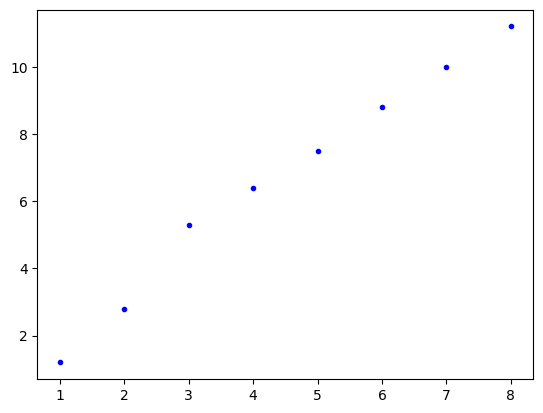

In [121]:
X = torch.tensor([1.0, 2, 3, 4, 5, 6, 7, 8])
f = torch.tensor([1.2, 2.8, 5.3, 6.4, 7.5, 8.8, 10, 11.2])
X = X.reshape(8, 1)
f = f.reshape(8, 1)

a = torch.randn(2, requires_grad=True)
N = 1000

loss_save = np.zeros(N)

for i in range(N):
    # if i<10: print(a)
    y_pr = lin_f(X, a)
    loss = mse(y_pr, f)
    loss.backward()
    loss_save[i] = loss
    with torch.no_grad():
        a -= a.grad * 0.5
        a.grad.zero_()

print(a)

fig = plt.figure()
ax = plt.axes()
ax.plot(X, f.detach().numpy(), ".", color="blue")
ax.plot(X, y_pr.detach().numpy(), alpha=0.4, color="red")
# ax.set_xlim([0, 3])
# ax.set_ylim([-3, 2])
plt.show()

In [127]:
# train_data = torch.utils.data.TensorDataset(X, f)

# batch_size = 1
# train_dl = torch.utils.data.DataLoader(train_data, batch_size, shuffle=True)
# model = torch.nn.Linear(1, 1)
# torch.nn.functional.mse_loss
# torch.optim.SGD(model.parameters(), lr=1e-5)

###

import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

X = torch.tensor([1.0, 2, 3, 4, 5, 6, 7, 8])
f = torch.tensor([1.2, 2.8, 5.3, 6.4, 7.5, 8.8, 10, 11.2])  # to co na osi y, czyli f=y
X = X.reshape(8, 1)  # we need matrix
f = f.reshape(8, 1)

train_data = torch.utils.data.TensorDataset(X, f)
batch_size = 1
train_dl = torch.utils.data.DataLoader(train_data, batch_size, shuffle=True)

model = torch.nn.Linear(1, 1)
preds = model(X)

loss_fn = torch.nn.functional.mse_loss
loss = loss_fn(model(X), f)
loss_history = []

opt = torch.optim.SGD(model.parameters(), lr=1e-5)


def fit(num_epochs, model, loss_fn, opt, train_dl):
    for epoch in range(num_epochs):
        for x_pull, y_pull in train_dl:
            pred = model(x_pull)  # predict
            loss = loss_fn(pred, y_pull)  # calculate loss
            loss.backward()  # calculate gradient
            opt.step()  # optimise coefficients
            opt.zero_grad()  # reset grad

        loss_history.append(loss.item())


N = 1000

fit(N, model, loss_fn, opt, train_dl)
preds = model(X)  # last iteration
print(X)
print(f)

fig = plt.figure()
ax = plt.axes()
ax.plot(np.arange(0, N, 1), loss_history)
# ax.set_yscale('log')

fig2 = plt.figure()
ax = plt.axes()
ax.plot(X, preds.detach().numpy(), alpha=0.4, color="red")
ax.plot(X, f.detach().numpy(), ".", color="blue")
plt.show()


AttributeError: 'tuple' object has no attribute 'size'

a[0].item()=0.5851195454597473
b[0].item()=-0.1980859488248825
predicted=tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan])


(-3.0, 2.0)

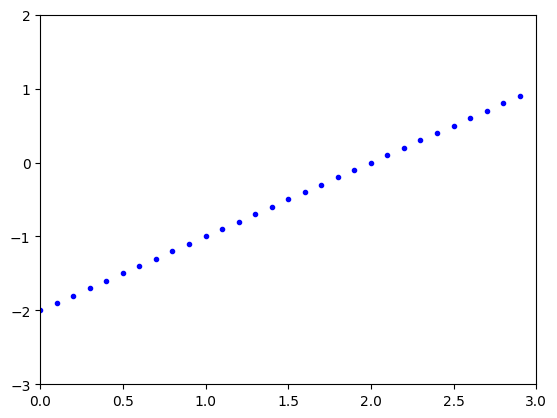

In [117]:
# moje bladzenie:
a = torch.randn(1)
b = torch.randn(1)
N = 1000

print(f"{a[0].item()=}")
print(f"{b[0].item()=}")

f_train = lin_f(X, [b, a])


class LinearRegressionModel(torch.nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.linear = torch.nn.Linear(1, 1)  # One in and one out

    def forward(self, x):
        y_pred = self.linear(x)
        return y_pred


our_model = LinearRegressionModel()

criterion = torch.nn.MSELoss(size_average=False)
optimizer = torch.optim.SGD(our_model.parameters(), lr=0.01)

for epoch in range(N):
    # Forward pass: Compute predicted y by passing
    # x to the model
    pred_y = our_model(X.reshape(30, 1))

    # Compute and print loss
    loss = criterion(pred_y, f_train)

    # Zero gradients, perform a backward pass and update the weights.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    # print("epoch {}, loss {}".format(epoch, loss.item()))

predicted = [our_model(torch.tensor([1.0])) for _ in X]
predicted = torch.tensor(predicted)

print(f"{predicted=}")

fig = plt.figure()
ax = plt.axes()
ax.plot(X, predicted.detach().numpy(), alpha=0.4, color="red")
ax.plot(X, f.detach().numpy(), ".", color="blue")
ax.set_xlim([0, 3])
ax.set_ylim([-3, 2])
